In [19]:
%%bash 
pip install arch
pip install numpy
pip install pandas
pip install seaborn
pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import os
import seaborn as sns
from scipy import stats
from mlxtend.evaluate import permutation_test

In [3]:
A=pd.read_pickle("data/allyears-avg_plate.pkl")


In [4]:
# Permutation test for combined off-festival vs festival period
p_value = permutation_test( A.loc[A['festival'] == 'during', 'Bioindicator'] , 
                            A.loc[A['festival'] != 'during', 'Bioindicator'] , 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.0007999200079992001


In [5]:
for c in ['Bioindicator','Coliform']:
    p1 = permutation_test( A.loc[A['year'] == 16 , c] , 
                                A.loc[A['year'] == 17, c] , 
                               method='approximate',
                               num_rounds=10000,
                               seed=0)
    p2 = permutation_test( A.loc[A['year'] == 16 , c] , 
                                A.loc[A['year'] == 20, c] , 
                               method='approximate',
                               num_rounds=10000,
                               seed=0)
    p3 = permutation_test( A.loc[A['year'] == 17 , c] , 
                                A.loc[A['year'] == 20, c] , 
                               method='approximate',
                               num_rounds=10000,
                               seed=0)
    print(f"16vs17 = {p1}, 16vs20 = {p2}, 17vs20 = {p3} on {c}")

16vs17 = 0.013998600139986002, 16vs20 = 0.0644935506449355, 17vs20 = 0.29727027297270275 on Bioindicator
16vs17 = 0.8538146185381462, 16vs20 = 0.0013998600139986002, 17vs20 = 0.0026997300269973002 on Coliform


In [6]:
p_value = permutation_test( A.loc[(A['year']==16) & (A['festival'] == 'during'), 'Bioindicator'] , 
                            A.loc[(A['year']==17) & (A['festival'] == 'during'), 'Bioindicator'], 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.35326467353264673


In [7]:
p_value = permutation_test( A.loc[(A['year']==16) & (A['festival'] == 'during'), 'Bioindicator'] , 
                            A.loc[(A['year']==16) & (A['festival'] != 'during'), 'Bioindicator'], 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.0387961203879612


In [8]:
p_value = permutation_test( A.loc[(A['year']==17) & (A['festival'] == 'during'), 'Bioindicator'] , 
                            A.loc[(A['year']==17) & (A['festival'] != 'during'), 'Bioindicator'], 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.0014998500149985001


In [9]:
main_vars=['Bioindicator', 'Coliform', 'Bioindicator UV+',  'total' ,'rain', 'rooms']
A[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.413961,0.798730,0.479667,0.108622,0.321153
Coliform,0.413961,1.000000,0.332692,0.828321,-0.048135,0.240064
Bioindicator UV+,0.798730,0.332692,1.000000,0.579050,-0.160397,0.228377
total,0.479667,0.828321,0.579050,1.000000,-0.074906,0.223255
rain,0.108622,-0.048135,-0.160397,-0.074906,1.000000,0.399218
rooms,0.321153,0.240064,0.228377,0.223255,0.399218,1.000000


In [10]:
def append_vars(ds, cols):
    v=ds[cols]
    X=ds.drop(columns=cols)
    return pd.concat([X.assign(cfu=ds[col], name=ds['year'].apply(lambda y: f"{col} {y}")) for col in cols]).dropna()

In [11]:
A2=append_vars(A, ['Bioindicator', 'Bioindicator UV+', 'Coliform', 'total'])

In [12]:
A.query('year==16')[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.523058,NaN,0.715661,0.258406,0.428517
Coliform,0.523058,1.000000,NaN,0.525955,0.000000,0.025524
Bioindicator UV+,NaN,NaN,NaN,NaN,NaN,NaN
total,0.715661,0.525955,NaN,1.000000,0.067048,0.200959
rain,0.258406,0.000000,NaN,0.067048,1.000000,0.893917
rooms,0.428517,0.025524,NaN,0.200959,0.893917,1.000000


In [13]:
A.query('year==17')[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.524712,0.798730,0.560946,0.044919,0.318992
Coliform,0.524712,1.000000,0.332692,0.863527,-0.205598,0.645251
Bioindicator UV+,0.798730,0.332692,1.000000,0.579050,-0.160397,0.228377
total,0.560946,0.863527,0.579050,1.000000,-0.279654,0.648239
rain,0.044919,-0.205598,-0.160397,-0.279654,1.000000,-0.013363
rooms,0.318992,0.645251,0.228377,0.648239,-0.013363,1.000000


In [14]:
A.query('year==20')[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.282178,NaN,0.313524,0.121148,0.261842
Coliform,0.282178,1.000000,NaN,0.808145,0.159472,0.508954
Bioindicator UV+,NaN,NaN,NaN,NaN,NaN,NaN
total,0.313524,0.808145,NaN,1.000000,0.292094,0.668511
rain,0.121148,0.159472,NaN,0.292094,1.000000,0.579178
rooms,0.261842,0.508954,NaN,0.668511,0.579178,1.000000


In [15]:
A[main_vars].corr(method ='spearman') 

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.413961,0.798730,0.479667,0.108622,0.321153
Coliform,0.413961,1.000000,0.332692,0.828321,-0.048135,0.240064
Bioindicator UV+,0.798730,0.332692,1.000000,0.579050,-0.160397,0.228377
total,0.479667,0.828321,0.579050,1.000000,-0.074906,0.223255
rain,0.108622,-0.048135,-0.160397,-0.074906,1.000000,0.399218
rooms,0.321153,0.240064,0.228377,0.223255,0.399218,1.000000


In [16]:
A2[['cfu', 'rooms', 'rain']].corr(method ='spearman')

,cfu,rooms,rain
cfu,1.000000,0.221528,-0.035081
rooms,0.221528,1.000000,0.345761
rain,-0.035081,0.345761,1.000000


In [17]:
def bootstrap_ci(df, variable, classes, repetitions = 1000, alpha = 0.05, random_state=None): 
    
    df = df[[variable, classes]]
    bootstrap_sample_size = len(df) 
    
    mean_diffs = []
    for i in range(repetitions):
            bootstrap_sample = df.sample(n = bootstrap_sample_size, replace = True, random_state = random_state)
            mean_diff = bootstrap_sample.groupby(classes).mean().iloc[1,0] - bootstrap_sample.groupby(classes).mean().iloc[0,0]
            mean_diffs.append(mean_diff)
    # confidence interval
    left = np.percentile(mean_diffs, alpha/2*100)
    right = np.percentile(mean_diffs, 100-alpha/2*100)
    # point estimate
    point_est = df.groupby(classes).mean().iloc[1,0] - df.groupby(classes).mean().iloc[0,0]
    print('Point estimate of difference between means:', round(point_est,2))
    print((1-alpha)*100,'%','confidence interval for the difference between means:', (round(left,2), round(right,2)))


In [20]:
import arch.data.frenchdata
from arch.bootstrap import StationaryBootstrap,IndependentSamplesBootstrap

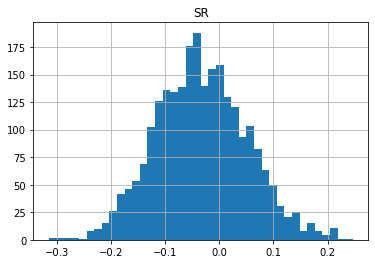

In [21]:
def foi(X):
    return X[['cfu', 'rooms', 'rain']].corr(method ='spearman')['cfu']['rain']
    
bs = StationaryBootstrap(12, A2)
results = bs.apply(foi, 2500)
SR = pd.DataFrame(results[:, -1:], columns=["SR"])
fig = SR.hist(bins=40)


In [22]:
ci = bs.conf_int(foi, 1000, method="percentile", reuse=True)
ci


/Users/kato/anaconda3/lib/python3.7/site-packages/arch/bootstrap/base.py:685: RuntimeWarning: The conditions to reuse the previous bootstrap has not been satisfied. A new bootstrap will be used.
  warnings.warn(warn, RuntimeWarning)


array([[-0.20008459],
       [ 0.1353287 ]])

In [23]:
def mean_diff(x, y):
    return x.mean() - y.mean()

bs = IndependentSamplesBootstrap(A.loc[A['year'] == 16], A.loc[A['year'] == 20])
print(bs.conf_int(mean_diff, method="studentized"))


StudentizationError: 
The estimated covariance computed in the studentication is numerically 0.
This might occur if your statistic has no variation. It is not possible to
apply the studentized bootstrap if any of the variances the values returned
by func have not variability when resampled. The estimated covariance
is:

 [[6.09003938e+05 0.00000000e+00 4.05197396e+02 1.44864454e+04
  3.80442704e+04 2.58022158e+05 4.02730564e+02            nan]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00            nan]
 [4.05197396e+02 0.00000000e+00 1.20137112e+00 1.89703409e+01
  3.85232060e-01 1.19202958e+02 1.74850725e-01            nan]
 [1.44864454e+04 0.00000000e+00 1.89703409e+01 2.85057591e+03
  2.97990400e+03 1.27440394e+04 2.54599447e+00            nan]
 [3.80442704e+04 0.00000000e+00 3.85232060e-01 2.97990400e+03
  2.19226485e+04 7.36443613e+04 1.36616522e+01            nan]
 [2.58022158e+05 0.00000000e+00 1.19202958e+02 1.27440394e+04
  7.36443613e+04 3.70711246e+05 9.70945622e+01            nan]
 [4.02730564e+02 0.00000000e+00 1.74850725e-01 2.54599447e+00
  1.36616522e+01 9.70945622e+01 3.78825688e-01            nan]
 [           nan            nan            nan            nan
             nan            nan            nan            nan]]
